### 4.3. Слияние, объединение и изменение формы данных

- Слияние двух DataFrame с помощью merge
- Объединение двух DataFrame с помощью concat
- Изменение формы данных с помощью melt и pivot

**Задача**: Слияние и объединение двух DataFrame, а также изменение формы датасета с помощью методов melt и pivot.

In [15]:
import pandas as pd
import numpy as np
# Загрузка CSV файла в DataFrame.
# Используем сохраненный в предыдущем примере датасет, указываем, что первый столбец является индексом
df = pd.read_csv('train_dataset.csv', encoding = 'utf-8', sep = ',', index_col=0)

#### Слияние двух DataFrame с помощью merge



Метод **pd.merge()** используется для объединения двух или более DataFrame по одной или нескольким колонкам. Это похоже на операцию JOIN в SQL. Синтаксис функции следующий:

In [ ]:
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None,
         left_index=False, right_index=False, sort=True)


**left**: первый DataFrame

**right**: второй DataFrame

**on**: имя или список имен для столбцов, по которым нужно объединить DataFrame. Эти имена должны присутствовать в обоих DataFrame.

**how**: тип слияния, которое нужно выполнить. Он может принимать значения 'inner', 'outer', 'left', 'right'. По умолчанию 'inner'.

**left_on**: столбцы из левого DataFrame, которые должны быть использованы как ключи слияния.

**right_on**: столбцы из правого DataFrame, которые должны быть использованы как ключи слияния.

**left_index** и **right_index**: если установлено значение True, то индекс DataFrame будет использоваться в качестве ключа слияния.

Для этого примера я сделаю два DataFrame: **df1** будет содержать данные о стране и численности населения, а **df2** будет содержать данные о стране и ВВП на душу населения.

In [4]:
# Создаем два DataFrame
df1 = df[['Страна', 'Численность']]
df2 = df[['Страна', 'ВВП на душу населения']]

# Слияние DataFrame
merged_df = pd.merge(df1, df2, on='Страна')
print(merged_df.head())


           Страна  Численность  ВВП на душу населения
0     Afghanistan     31056997                  700.0
1         Albania      3581655                 4500.0
2         Algeria     32930091                 6000.0
3  American Samoa        57794                 8000.0
4         Andorra        71201                19000.0


#### Объединение двух DataFrame с помощью concat



**pd.concat()** используется для объединения двух или более DataFrame вдоль определенной оси (строки или столбцы).

In [ ]:
pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None,
          levels=None, names=None, verify_integrity=False, copy=True)


**objs**: список или словарь объектов DataFrame, Series, Dict или NamedTuple для объединения.

**axis**: ось, вдоль которой будет производиться конкатенация. Если axis=0, конкатенация будет производиться по строкам (вертикально), если axis=1, то по столбцам (горизонтально).

**join**: может быть **'inner'** или **'outer'**. Если **'inner'**, то будут возвращены только те строки или столбцы, которые есть в обоих DataFrame, если **'outer'**, то будут возвращены все строки или столбцы.

Мы будем использовать те же DataFrame, что и в предыдущем примере.

In [7]:
# Объединение DataFrame
concatenated_df = pd.concat([df1, df2['ВВП на душу населения']], axis=1)
print(concatenated_df.head())


           Страна  Численность  ВВП на душу населения
0     Afghanistan     31056997                  700.0
1         Albania      3581655                 4500.0
2         Algeria     32930091                 6000.0
3  American Samoa        57794                 8000.0
4         Andorra        71201                19000.0


#### Изменение формы данных с помощью melt и pivot

**melt** и **pivot** - это два метода, которые используются для изменения формата представления данных в DataFrame. В некоторых случаях, в зависимости от того, что вы хотите сделать с данными, одна форма может быть более подходящей, чем другая.

Функция **melt** или метод **DataFrame.melt** предназначены для преобразования одного или более столбцов в строки с измеряемыми значениями. По умолчанию новый столбец с полученными строками имеет название **variable**, а столбец с измеряемыми значениями — **value**. Эти названия могут быть изменены параметрами **var_name** и **value_name**

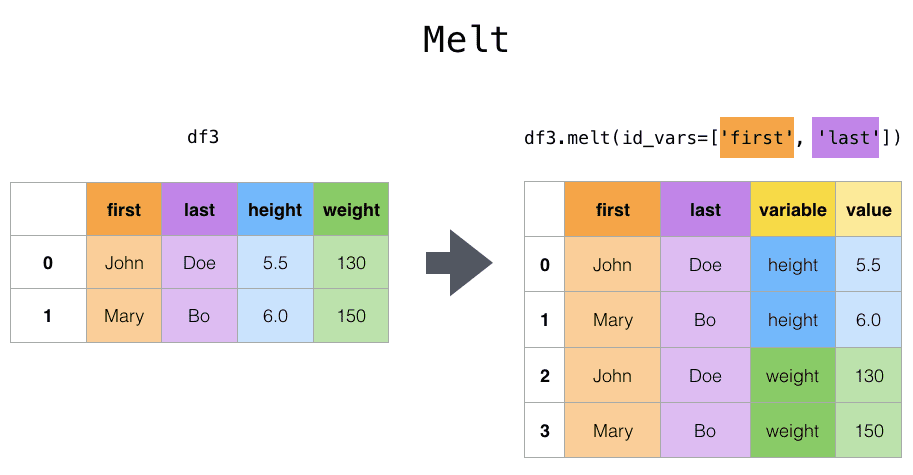

In [ ]:
pd.melt(frame, id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None)


**frame**: DataFrame для преобразования.

**id_vars**: колонки, которые нужно оставить как есть.

**value_vars**: колонки, которые нужно преобразовать в длинный формат. Если не указаны, все колонки, кроме указанных в id_vars, будут преобразованы.

**var_name** и **value_name**: имена для новых колонок в длинном формате.

Чтобы в таблице задать новый столбец с другими значениями индексов, используйте в Pandas метод **pivot**.  Для изменения формы указываются аргументы: **index (индекс)**, **columns (столбцы), values (значения)**. Вам может понадобится **pivot** тогда, когда нужно зафиксировать новый индекс с новым столбцом.

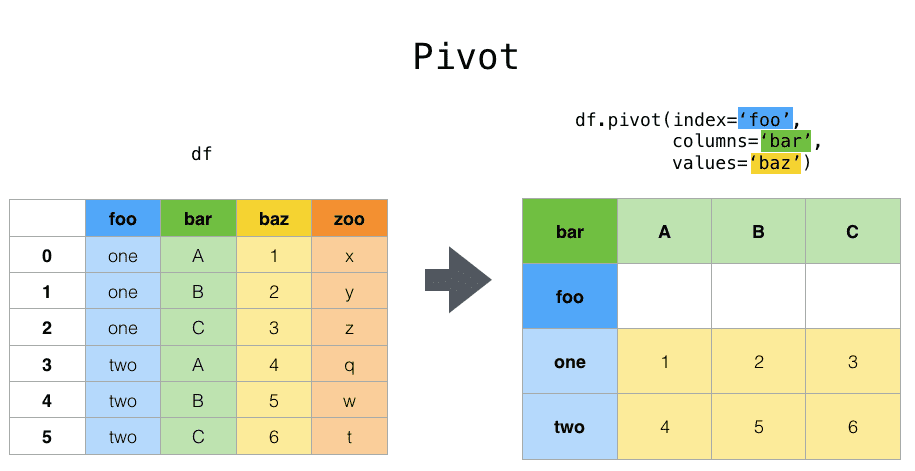

In [ ]:
DataFrame.pivot(index=None, columns=None, values=None)


**index**: имя или объект для создания нового уровня индекса в результирующем DataFrame.

**columns**: имя или объект, который будет преобразован в новые колонки в результирующем DataFrame.

**values**: имя или объект, который будет использоваться для заполнения ячеек в результирующем DataFrame. Если не указаны, все оставшиеся колонки будут использованы.

In [14]:
# Используем melt для преобразования DataFrame
melted_df = pd.melt(df, id_vars=['Страна', 'Регион'], value_vars=['ВВП на душу населения', 'Численность'])
print(melted_df.head())

# Используем pivot для преобразования обратно
pivoted_df = melted_df.pivot(index='Страна', columns='variable', values='value')
print(pivoted_df.head())


           Страна            Регион               variable    value
0     Afghanistan              Азия  ВВП на душу населения    700.0
1         Albania  ВОСТОЧНАЯ ЕВРОПА  ВВП на душу населения   4500.0
2         Algeria   СЕВЕРНАЯ АФРИКА  ВВП на душу населения   6000.0
3  American Samoa           ОКЕАНИЯ  ВВП на душу населения   8000.0
4         Andorra   Западная Европа  ВВП на душу населения  19000.0
variable        ВВП на душу населения  Численность
Страна                                            
Afghanistan                     700.0   31056997.0
Albania                        4500.0    3581655.0
Algeria                        6000.0   32930091.0
American Samoa                 8000.0      57794.0
Andorra                       19000.0      71201.0
